<a href="https://colab.research.google.com/github/vijaydevverse/data-science-eda-ml-projects/blob/main/SleepDataEdaV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/dataset_2191_sleep.csv")

In [ ]:
df

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645,3,5,3,3.3
1,1.000,6.6,4.5,42,3,1,3,8.3
2,3.385,44.5,14,60,1,1,1,12.5
3,0.920,5.7,?,25,5,2,3,16.5
4,2547.000,4603.0,69,624,3,5,4,3.9
...,...,...,...,...,...,...,...,...
57,2.000,12.3,7.5,200,3,1,3,5.4
58,0.104,2.5,2.3,46,3,2,2,15.8
59,4.190,58.0,24,210,4,3,4,10.3
60,3.500,3.9,3,14,2,1,1,19.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_weight           62 non-null     float64
 1   brain_weight          62 non-null     float64
 2   max_life_span         62 non-null     object 
 3   gestation_time        62 non-null     object 
 4   predation_index       62 non-null     int64  
 5   sleep_exposure_index  62 non-null     int64  
 6   danger_index          62 non-null     int64  
 7   total_sleep           62 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 4.0+ KB


In [ ]:
df["max_life_span"].replace("?", np.nan, inplace=True)
df["gestation_time"].replace("?", np.nan, inplace=True)
df["total_sleep"].replace("?", np.nan, inplace=True)

df["max_life_span"] = pd.to_numeric(df["max_life_span"])
df["gestation_time"] = pd.to_numeric(df["gestation_time"])
df["total_sleep"] = pd.to_numeric(df["total_sleep"])

/tmp/ipython-input-2589078567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_life_span"].replace("?", np.nan, inplace=True)
/tmp/ipython-input-2589078567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df.isnull().sum()

,0
body_weight,0
brain_weight,0
max_life_span,4
gestation_time,4
predation_index,0
sleep_exposure_index,0
danger_index,0
total_sleep,4


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(62, 8)

In [ ]:
df.head()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645.0,3,5,3,3.3
1,1.000,6.6,4.5,42.0,3,1,3,8.3
2,3.385,44.5,14.0,60.0,1,1,1,12.5
3,0.920,5.7,NaN,25.0,5,2,3,16.5
4,2547.000,4603.0,69.0,624.0,3,5,4,3.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_weight           62 non-null     float64
 1   brain_weight          62 non-null     float64
 2   max_life_span         58 non-null     float64
 3   gestation_time        58 non-null     float64
 4   predation_index       62 non-null     int64  
 5   sleep_exposure_index  62 non-null     int64  
 6   danger_index          62 non-null     int64  
 7   total_sleep           58 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 4.0 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

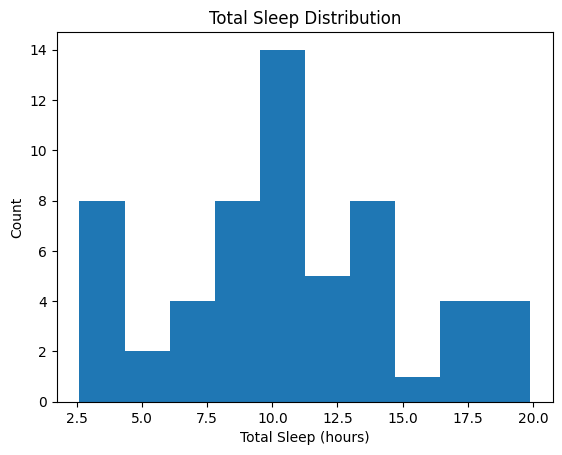

In [ ]:
plt.hist(df["total_sleep"])
plt.title("Total Sleep Distribution")
plt.xlabel("Total Sleep (hours)")
plt.ylabel("Count")
plt.show()

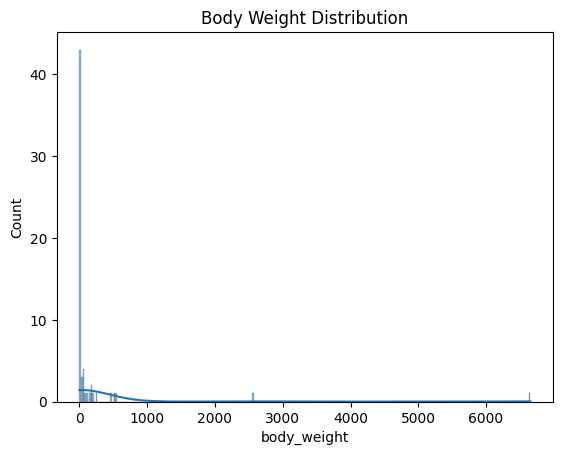

In [ ]:
sns.histplot(df['body_weight'], kde=True)
plt.title("Body Weight Distribution")
plt.show()

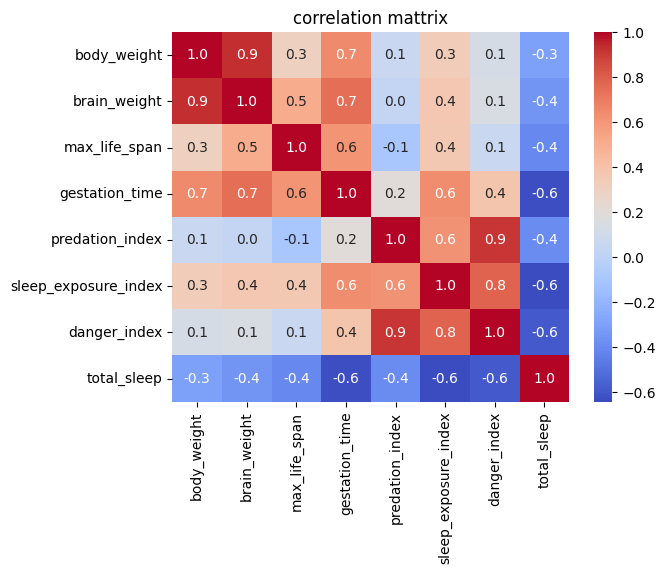

In [ ]:
cm=df.corr()
sns.heatmap(cm,annot=True,fmt="0.1f",cmap="coolwarm")
plt.title("correlation mattrix")
plt.show()

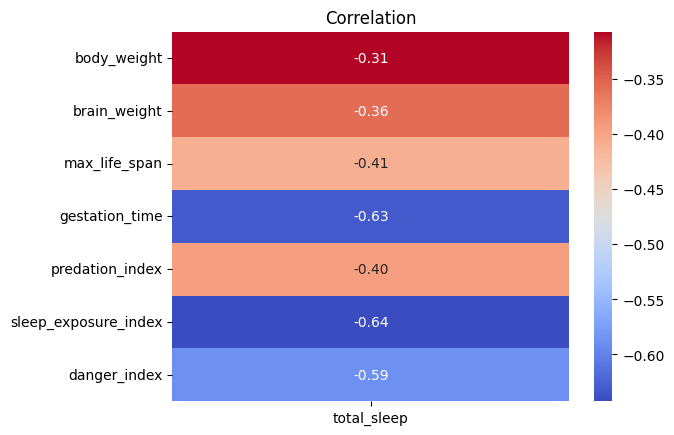

In [ ]:
survived_corr = df.corr()["total_sleep"]
survived_corr = survived_corr.drop('total_sleep')
sns.heatmap(survived_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.title('Correlation')
plt.show()

<Axes: >

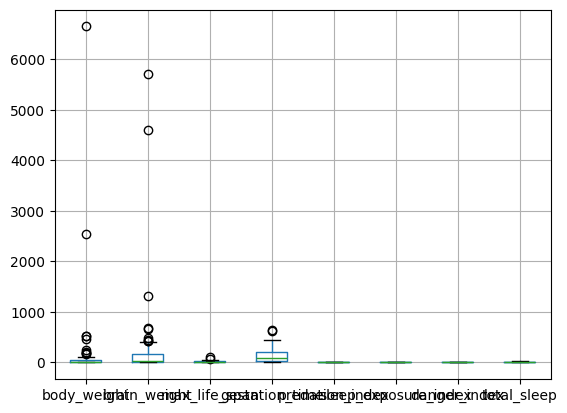

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

df_cleaned=remove_outliers_iqr(df,exclude_column='total_sleep')
df=df_cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1 to 61
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_weight           31 non-null     float64
 1   brain_weight          31 non-null     float64
 2   max_life_span         31 non-null     float64
 3   gestation_time        31 non-null     float64
 4   predation_index       31 non-null     int64  
 5   sleep_exposure_index  31 non-null     int64  
 6   danger_index          31 non-null     int64  
 7   total_sleep           30 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 2.2 KB


In [ ]:
df.shape

(31, 8)

In [ ]:
df

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
1,1.000,6.60,4.5,42.0,3,1,3,8.3
2,3.385,44.50,14.0,60.0,1,1,1,12.5
6,0.023,0.30,19.0,35.0,1,1,1,19.7
8,3.300,25.60,28.0,63.0,1,2,1,14.5
14,0.075,1.20,3.5,42.0,1,1,1,8.4
16,0.785,3.50,6.0,42.0,2,2,2,10.7
17,0.200,5.00,10.4,120.0,2,2,2,10.7
22,0.120,1.00,3.9,16.0,3,1,2,14.4
25,36.330,119.50,16.2,63.0,1,1,1,13.0
26,0.101,4.00,9.0,28.0,5,1,3,13.8


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

features=["body_weight","brain_weight","max_life_span",
            "gestation_time","predation_index",
            "sleep_exposure_index","danger_index"]

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df[features])

scaled_df=pd.DataFrame(scaled_data, columns=features)

In [ ]:
df.isnull().sum()

,0
body_weight,0
brain_weight,0
max_life_span,0
gestation_time,0
predation_index,0
sleep_exposure_index,0
danger_index,0
total_sleep,1


In [ ]:
scaled_df["total_sleep"]=df["total_sleep"]

In [ ]:
scaled_df.head()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,0.027392,0.054122,0.096154,0.140845,0.5,0.0,0.666667,NaN
1,0.093049,0.371649,0.461538,0.225352,0.0,0.0,0.000000,8.3
2,0.000496,0.001340,0.653846,0.107981,0.0,0.0,0.000000,12.5
3,0.090709,0.213304,1.000000,0.239437,0.0,0.5,0.000000,NaN
4,0.001927,0.008881,0.057692,0.140845,0.0,0.0,0.000000,NaN


In [ ]:
df

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
1,1.000,6.60,4.5,42.0,3,1,3,8.3
2,3.385,44.50,14.0,60.0,1,1,1,12.5
6,0.023,0.30,19.0,35.0,1,1,1,19.7
8,3.300,25.60,28.0,63.0,1,2,1,14.5
14,0.075,1.20,3.5,42.0,1,1,1,8.4
16,0.785,3.50,6.0,42.0,2,2,2,10.7
17,0.200,5.00,10.4,120.0,2,2,2,10.7
22,0.120,1.00,3.9,16.0,3,1,2,14.4
25,36.330,119.50,16.2,63.0,1,1,1,13.0
26,0.101,4.00,9.0,28.0,5,1,3,13.8


In [ ]:
from sklearn.model_selection import train_test_split

X=scaled_df[["body_weight","brain_weight","max_life_span",
               "gestation_time","predation_index",
               "sleep_exposure_index","danger_index"]]

y=scaled_df["total_sleep"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = df.dropna(subset=["total_sleep"])

X = df.drop("total_sleep", axis=1)
y = df["total_sleep"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R2 Score): {accuracy:.2f}")

Model Accuracy (R2 Score): -2.67
